In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**<h3> List of Indicators used</h3>**

**<h4> Poverty </h4>**

1. Gini Index

2. Poverty PCA first component - Represents average of all poverty indicators
    
3. Poverty PCA second component - Represents Severity of poverty

**<h4> Health </h4>**

4. Life Expectancy
5. Number of physicians per 1000 people
6. Number of hospital beds per 1000 people 
7. Cause of death (% of total) by injury

**<h4>Education</h4>**

8. Percentage of population ages 25+ who have completed the following
    * Short-cycle tertiary
    * lower secondary
    * Atleast Master's or equivalent
    * Atleast Doctoral or equivalent

**<h4>Economy</h4>**

9. GDP (current USD)

10. Unemployment

11. Inflation, consumer prices (annual %)

12. Population, total

In [14]:
df = pd.read_csv('../data/interim/selected_features.csv',index_col=[0])

df.head()

,Country Name,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Inflation, consumer prices (annual %)",Gini index,GDP (current US$),"Cause of death, by injury (% of total)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Population, total","Unemployment, total (% of total labor force) (modeled ILO estimate)","Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)",GDP per capita,poverty_pca0,poverty_pca1
0,Ukraine,2002,88.543221,0.00000,0.757421,29.0,4.395616e+10,8.507397,16.28310,38.141708,48202470.0,10.140,8.89,68.275610,3.0188,911.906871,1.704357,-1.787438
1,Ukraine,2003,88.543221,0.00000,5.179678,28.7,5.201035e+10,8.507397,16.28310,38.141708,47812949.0,9.060,8.81,68.210732,3.0096,1087.788007,0.907426,-1.549600
2,Kyrgyz Republic,2007,95.692841,0.03193,10.230103,33.9,3.802571e+09,10.150055,15.44759,17.622650,5268400.0,2.677,5.06,67.895122,2.3580,721.769526,3.885685,-1.888312
3,Panama,2007,61.490292,0.25529,4.168633,52.7,2.129598e+10,12.359977,2.37209,21.358910,3431614.0,5.844,2.30,76.154000,1.3032,6205.821576,1.513857,-0.050925
4,Kyrgyz Republic,2008,95.692841,0.03193,24.520102,31.5,5.139959e+09,10.150055,15.44759,17.622650,5318700.0,2.770,5.01,68.451220,2.3528,966.393847,2.323284,-2.039820


Since alot of the values within countries were imputed, I'll split the dataset by randomly choosing 15 of the 60 countries as the validation dataset. This avoids data leakage.

In [15]:
import random

random.seed(144)

train_countries = set(df['Country Name'].unique())
test_countries = []
for i in range(15):
    country = random.choice(list(train_countries))
    test_countries.append(country)
    train_countries.remove(country)

print('train:',train_countries)
print('test:',test_countries)


train: {'Senegal', 'Indonesia', 'Lithuania', 'El Salvador', 'Belgium', 'Georgia', 'Brazil', 'Myanmar', 'Israel', 'Bhutan', 'United Kingdom', 'Albania', 'Vietnam', 'Korea, Rep.', 'Malta', 'Dominican Republic', 'Germany', 'Hungary', 'Portugal', 'Spain', 'Estonia', 'Ukraine', 'Bolivia', 'Belarus', 'United States', 'Italy', 'Costa Rica', 'Rwanda', 'Kyrgyz Republic', 'Niger', 'Latvia', 'Pakistan', 'Philippines', 'Norway', 'Uruguay', 'Serbia', 'Sweden', 'Guatemala', 'Czechia', 'Mongolia', 'Switzerland', 'Cyprus', 'Poland', 'Australia', 'Slovak Republic'}
test: ['Panama', 'Greece', 'Paraguay', 'Slovenia', 'Moldova', 'Malaysia', 'Mozambique', 'Mexico', 'Romania', 'Turkiye', 'Netherlands', 'North Macedonia', 'Bangladesh', 'United Arab Emirates', 'France']


In [16]:
is_test = []

for i in range(len(df)):
    if df['Country Name'][i] in test_countries:
        is_test.append(True)
    else:
        is_test.append(False)


In [17]:
print('train count: ',len(df[[not a for a in is_test]]))

df[[not a for a in is_test]].to_csv('../data/processed/train.csv')

print('test count:', len(df[is_test]))

df[is_test].to_csv('../data/processed/test.csv')



train count:  279
test count: 105


In [23]:
df[[not a for a in is_test]].describe().loc[['mean','50%'],:] #train mean and medians

,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Inflation, consumer prices (annual %)",Gini index,GDP (current US$),"Cause of death, by injury (% of total)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Population, total","Unemployment, total (% of total labor force) (modeled ILO estimate)","Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)",GDP per capita,poverty_pca0,poverty_pca1
mean,2014.767025,79.605549,0.652505,2.510327,34.734409,9.889778e+11,6.455172,10.075236,25.567272,4.091360e+07,7.899839,4.079827,77.025800,2.97459,24733.022943,0.029232,-0.007287
50%,2015.000000,86.918255,0.542620,1.917219,33.100000,2.093588e+11,5.326002,11.218936,25.326610,9.971727e+06,6.760000,3.415000,78.092683,3.09720,17945.222216,-0.931952,0.286044


In [24]:
df[is_test].describe().loc[['mean','50%']] #test mean and medians

,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Inflation, consumer prices (annual %)",Gini index,GDP (current US$),"Cause of death, by injury (% of total)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Population, total","Unemployment, total (% of total labor force) (modeled ILO estimate)","Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)",GDP per capita,poverty_pca0,poverty_pca1
mean,2014.52381,72.788179,0.549229,3.241560,37.285714,5.728812e+11,7.535234,6.520256,22.554074,3.159134e+07,8.074124,3.532473,76.98102,2.655987,19013.955292,-0.077673,0.019362
50%,2015.00000,69.472229,0.338630,2.506899,35.800000,1.997138e+11,6.767174,6.038727,21.992030,1.104501e+07,6.011000,3.490000,76.66000,2.496500,11076.134114,-0.662570,-0.000433


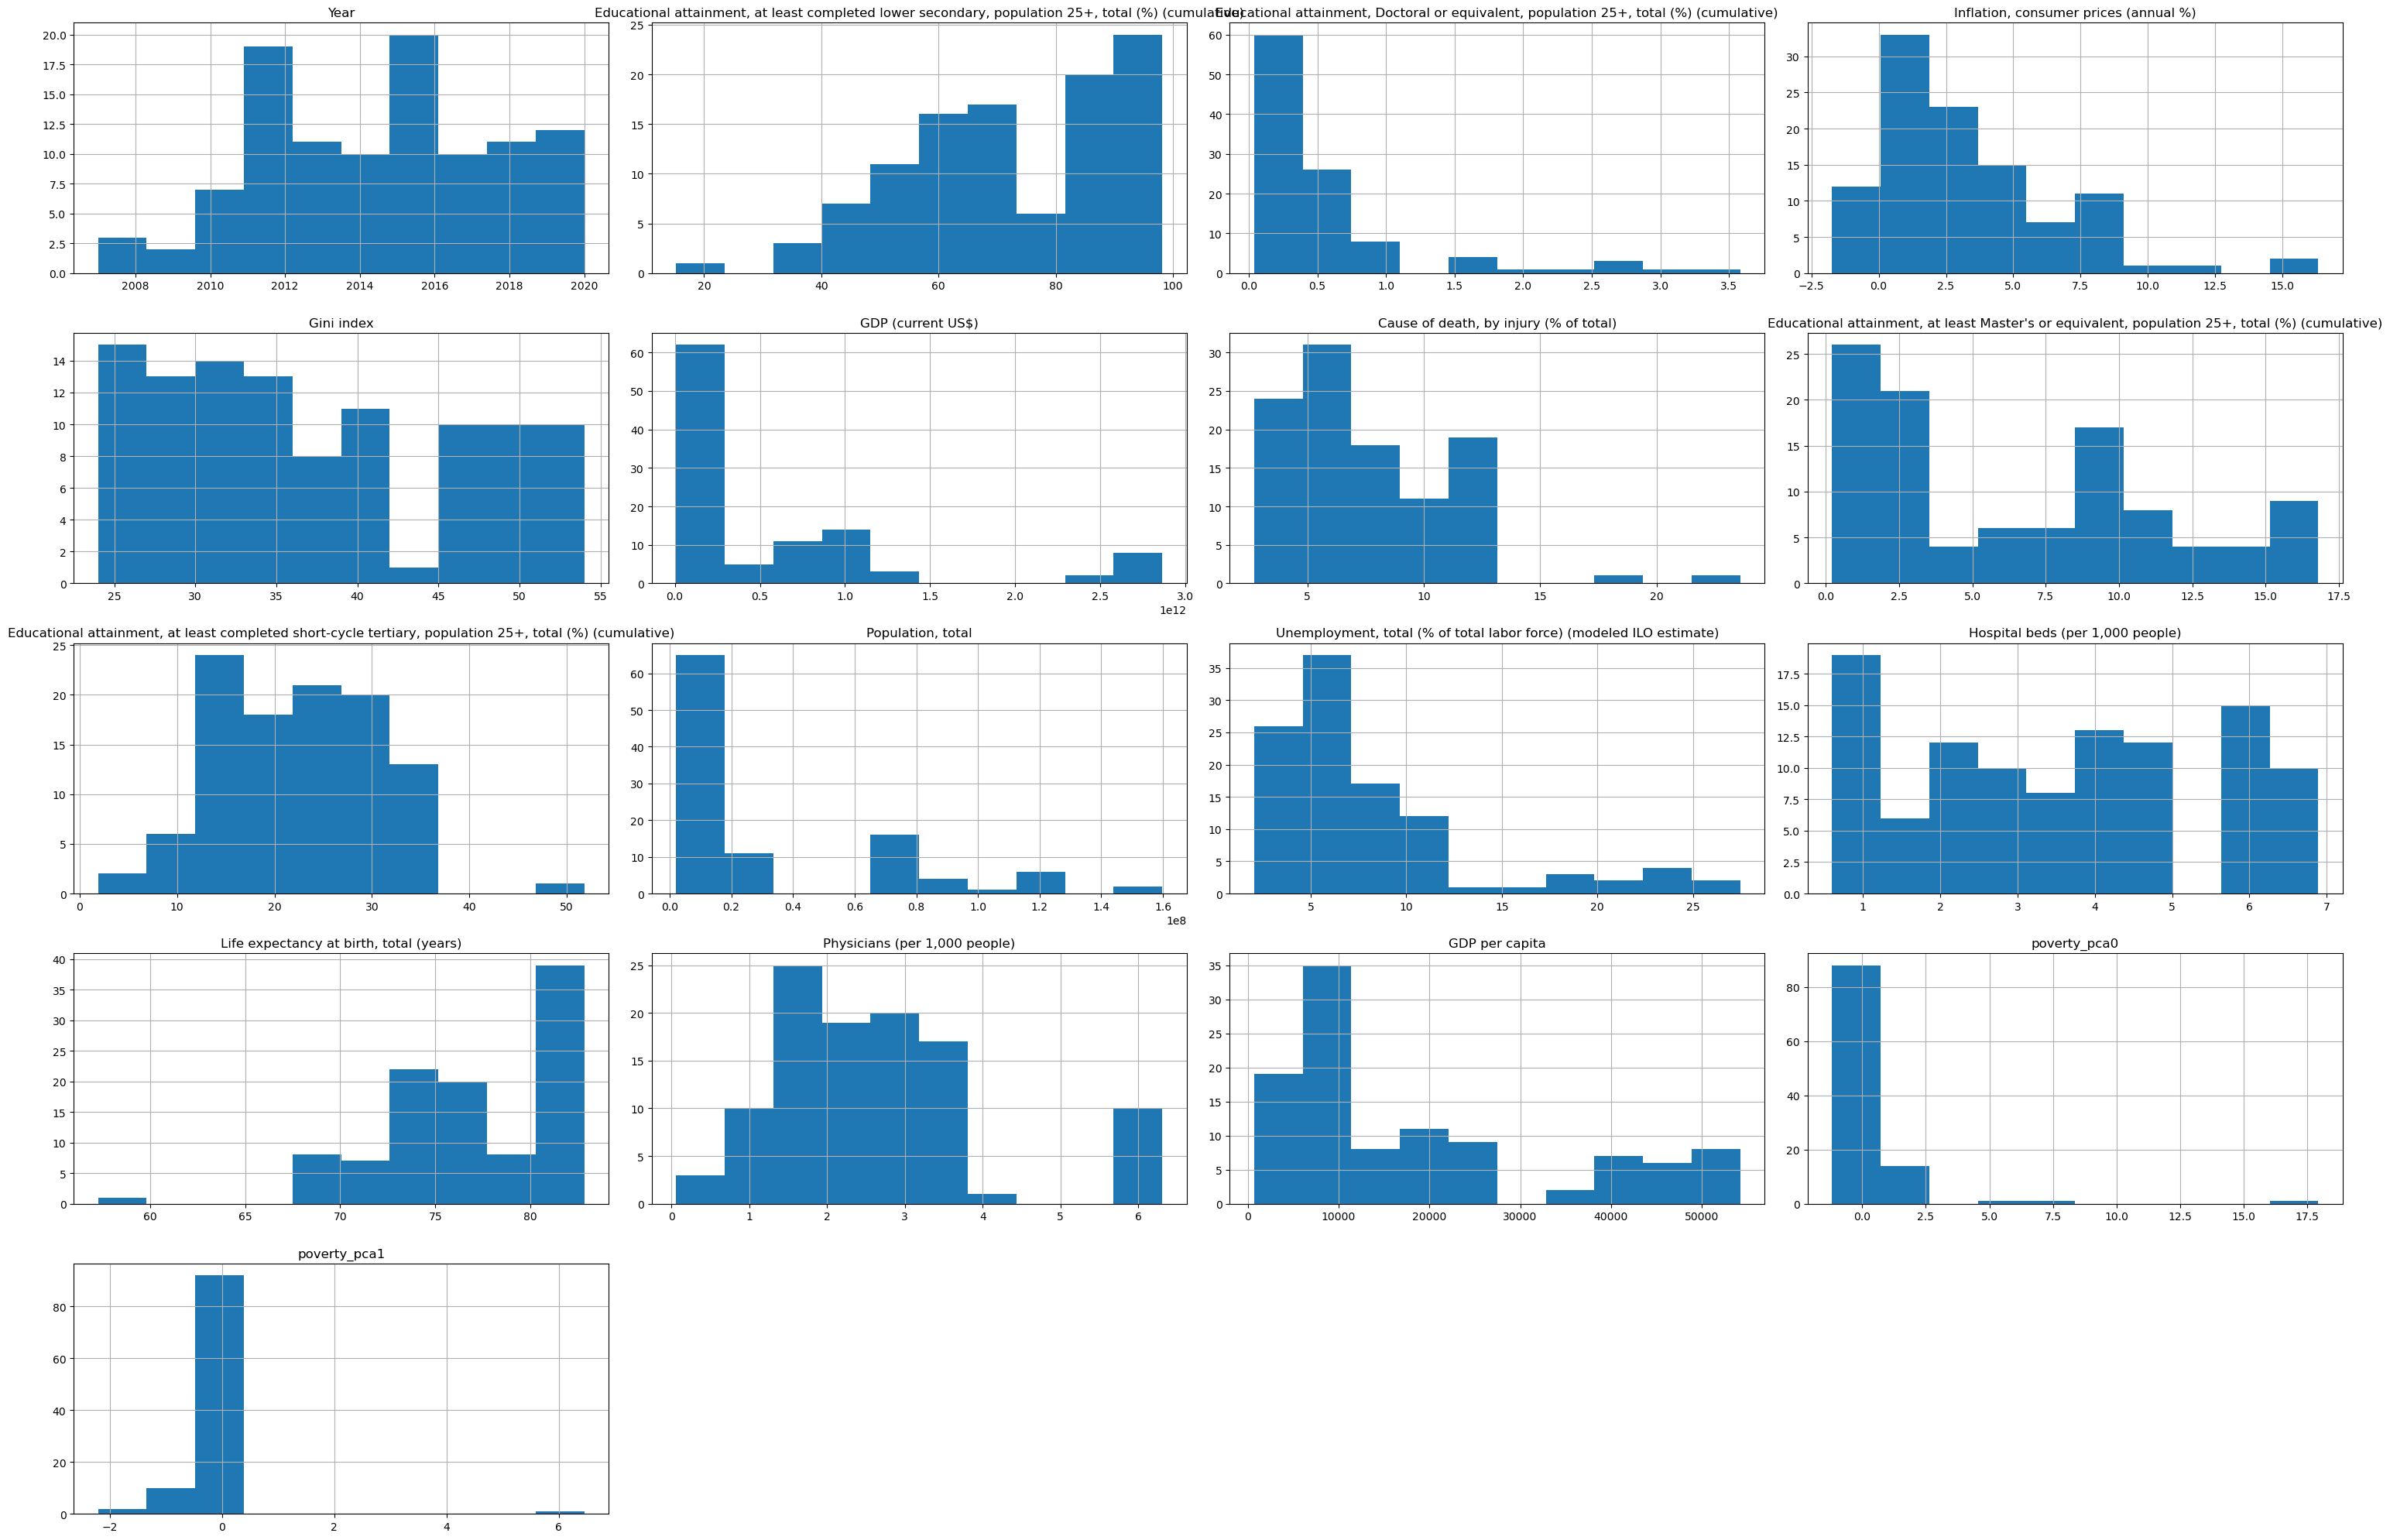

In [20]:
df[is_test].hist(figsize=(30,20))
plt.tight_layout();

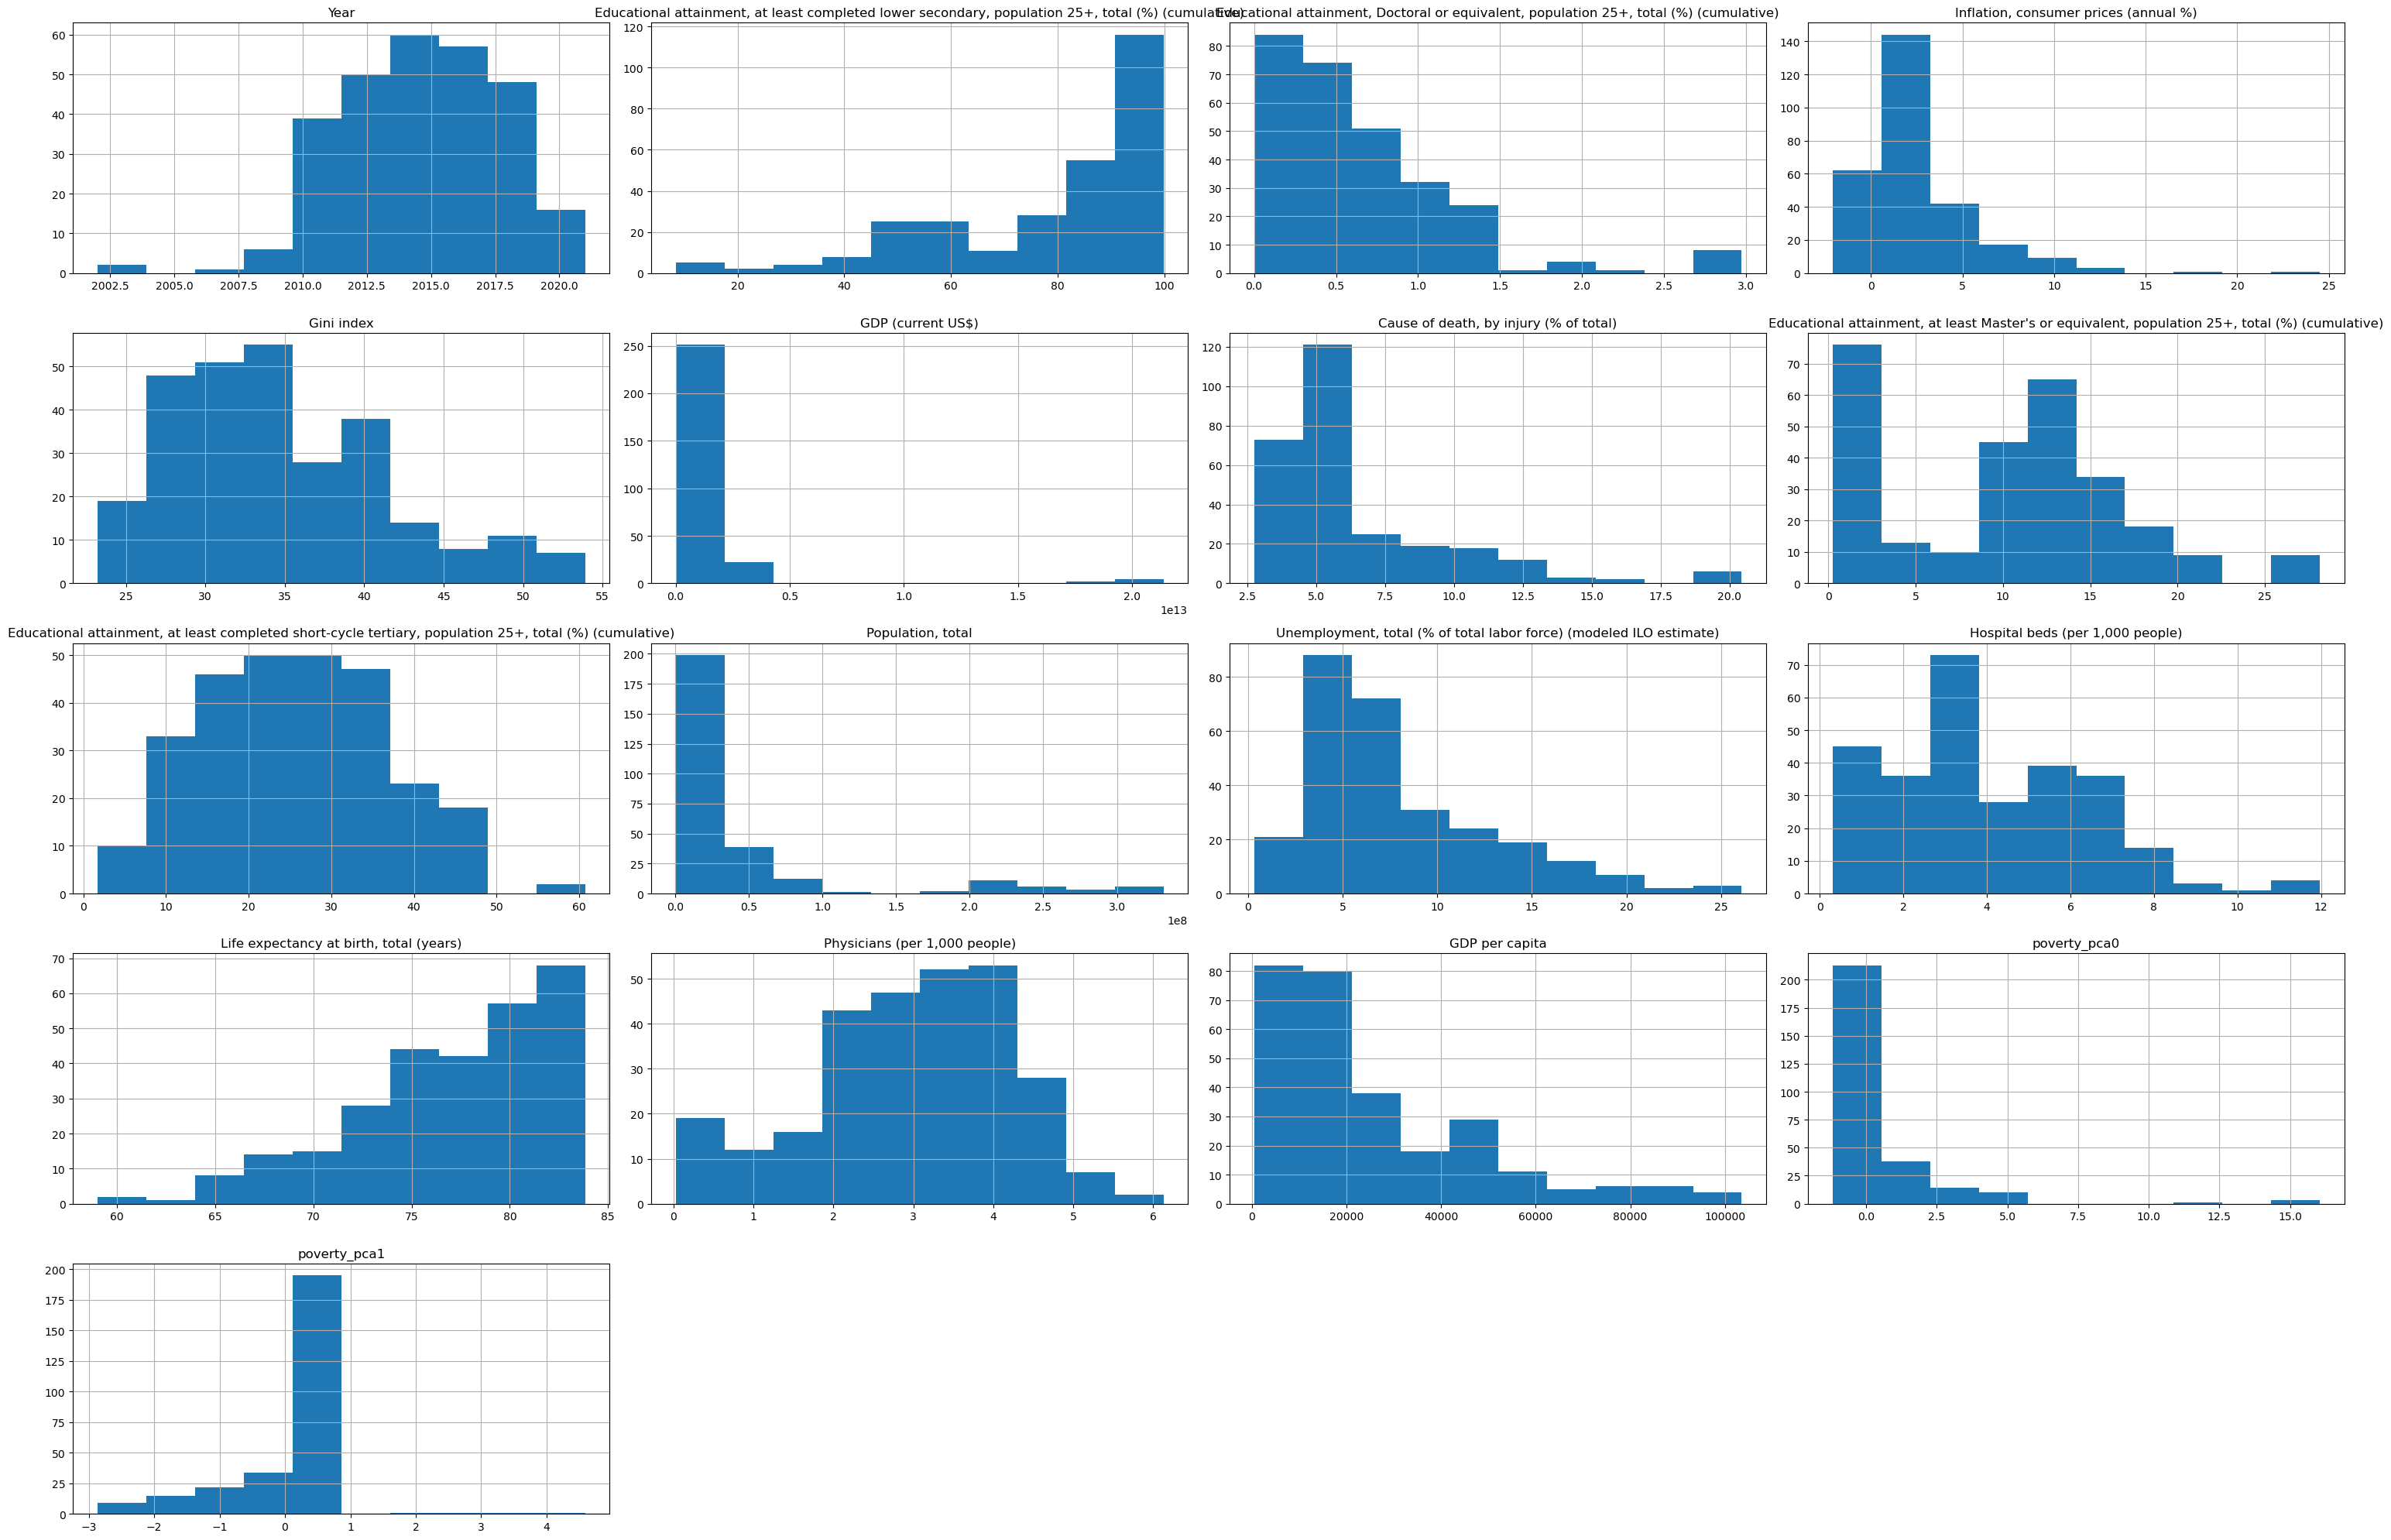

In [21]:
df[[not a for a in is_test]].hist(figsize=(30,20))
plt.tight_layout();

Although some of the distributions between the test and training sets are different, The distributions for Gini Index are similar. 